In [55]:
import numpy as np
import pandas as pd

IMPORTING DATA

In [56]:
crop = pd.read_csv("Crop_recommendation.csv")
crop.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


In [57]:
crop.shape

(2200, 8)

In [58]:
crop.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            2200 non-null   int64  
 1   P            2200 non-null   int64  
 2   K            2200 non-null   int64  
 3   temperature  2200 non-null   float64
 4   humidity     2200 non-null   float64
 5   ph           2200 non-null   float64
 6   rainfall     2200 non-null   float64
 7   label        2200 non-null   object 
dtypes: float64(4), int64(3), object(1)
memory usage: 137.6+ KB


In [59]:
crop.isnull().sum()

N              0
P              0
K              0
temperature    0
humidity       0
ph             0
rainfall       0
label          0
dtype: int64

In [60]:
crop.duplicated().sum()

0

In [61]:
crop.describe()

,N,P,K,temperature,humidity,ph,rainfall
count,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000
mean,50.551818,53.362727,48.149091,25.616244,71.481779,6.469480,103.463655
std,36.917334,32.985883,50.647931,5.063749,22.263812,0.773938,54.958389
min,0.000000,5.000000,5.000000,8.825675,14.258040,3.504752,20.211267
25%,21.000000,28.000000,20.000000,22.769375,60.261953,5.971693,64.551686
50%,37.000000,51.000000,32.000000,25.598693,80.473146,6.425045,94.867624
75%,84.250000,68.000000,49.000000,28.561654,89.948771,6.923643,124.267508
max,140.000000,145.000000,205.000000,43.675493,99.981876,9.935091,298.560117


EXPLORING DATA

In [62]:
import seaborn as sns
import matplotlib.pyplot as plt

C:\Users\deepu\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


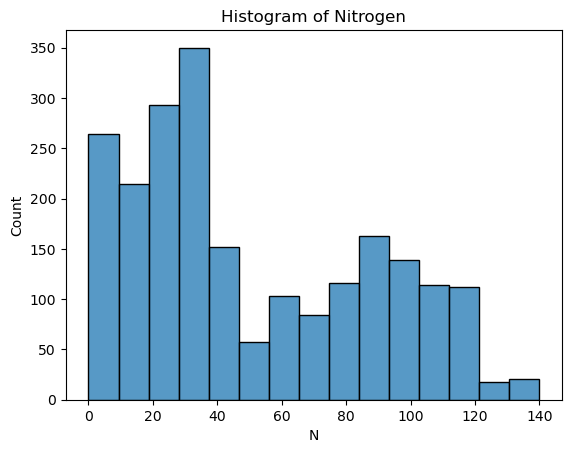

In [63]:
sns.histplot(crop['N'])
plt.title('Histogram of Nitrogen')

plt.show()

C:\Users\deepu\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


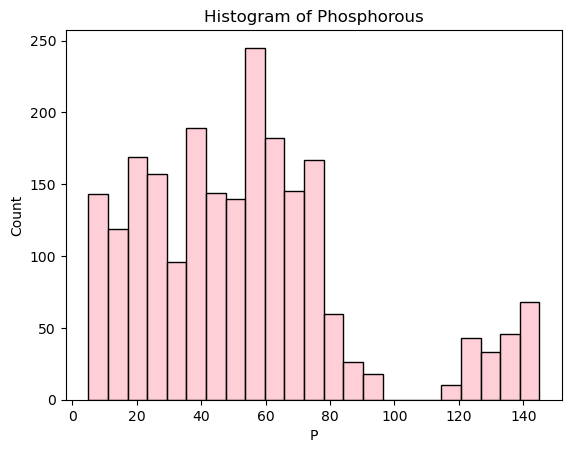

In [64]:
sns.histplot(crop['P'],color='Pink')
plt.title('Histogram of Phosphorous')
plt.show()

C:\Users\deepu\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


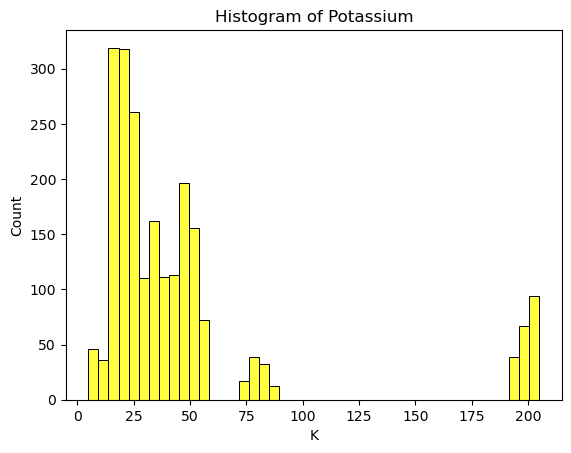

In [65]:
sns.histplot(crop['K'],color='yellow')
plt.title('Histogram of Potassium')
plt.show()

C:\Users\deepu\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


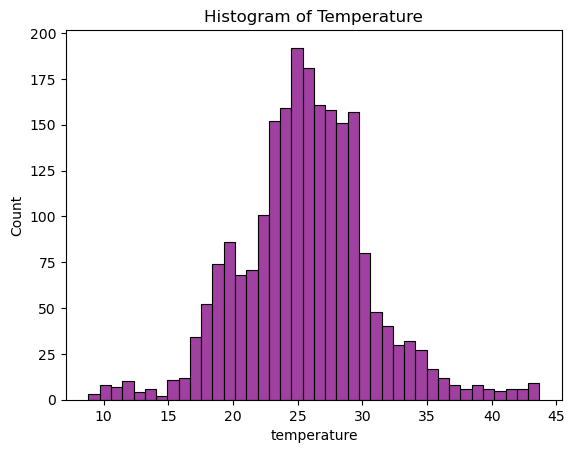

In [66]:
sns.histplot(crop['temperature'],color='Purple')
plt.title('Histogram of Temperature')
plt.show()

In [1]:
sns.histplot(crop['humidity'],color='Green')
plt.title('Histogram of Humidity')
plt.show()

NameError: name 'sns' is not defined

C:\Users\deepu\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


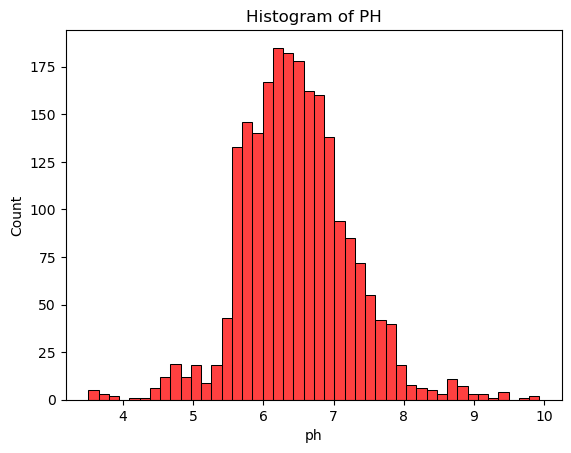

In [68]:
sns.histplot(crop['ph'],color='Red')
plt.title('Histogram of PH')
plt.show()

C:\Users\deepu\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


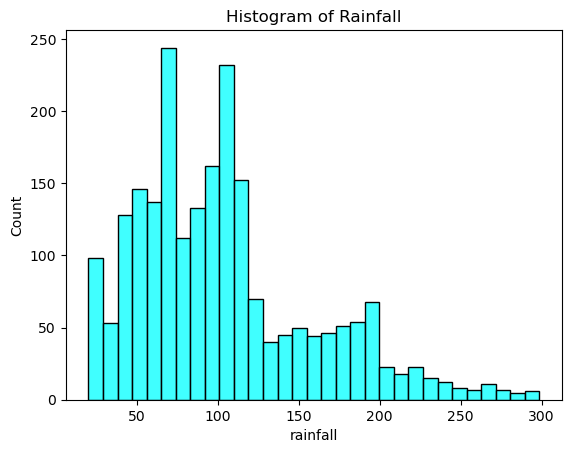

In [69]:
sns.histplot(crop['rainfall'],color='Cyan')
plt.title('Histogram of Rainfall')
plt.show()

FINDING OUTLIERS

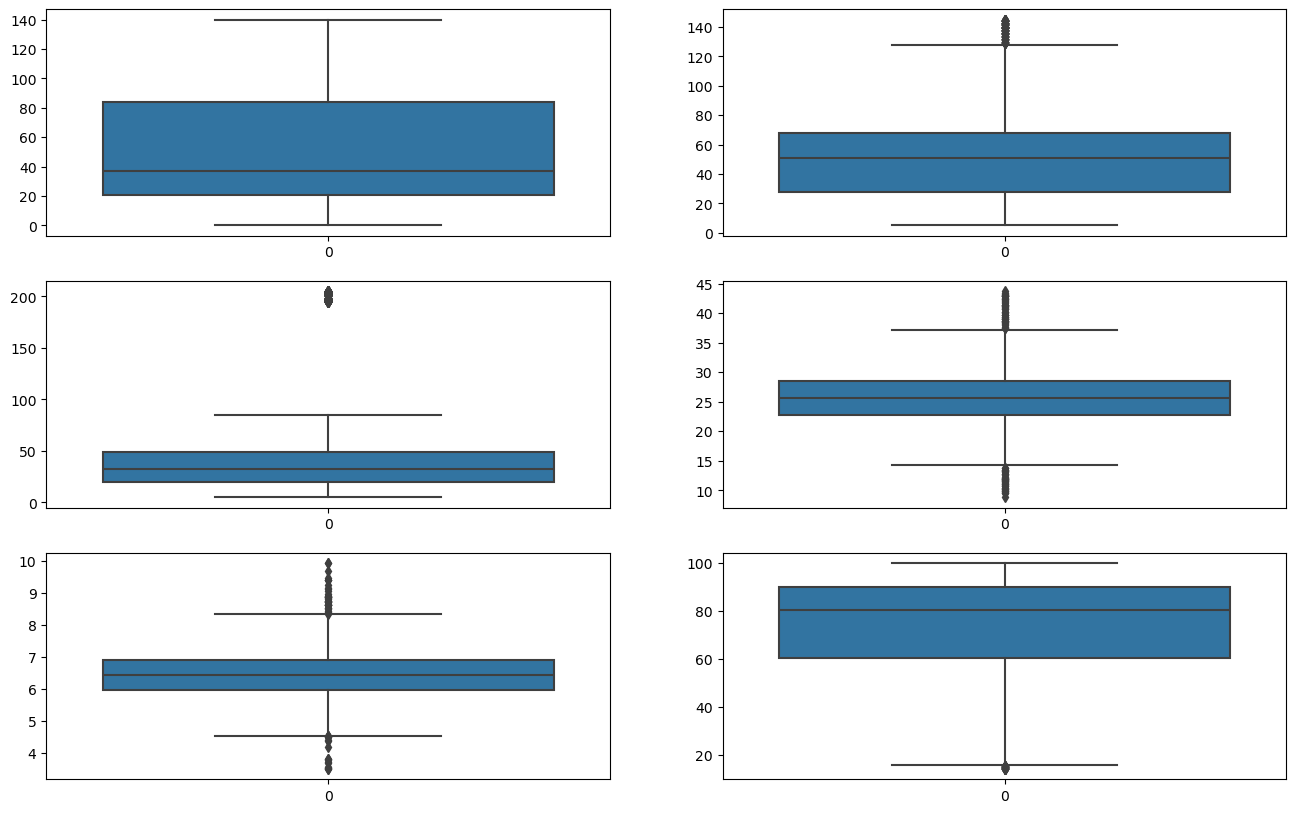

In [70]:
plt.figure(figsize=(16,10))
plt.subplot(3,2,1)
sns.boxplot(crop['N'])

plt.subplot(3,2,2)
sns.boxplot(crop['P'])

plt.subplot(3,2,3)
sns.boxplot(crop['K'])

plt.subplot(3,2,4)
sns.boxplot(crop['temperature'])

plt.subplot(3,2,5)
sns.boxplot(crop['ph'])

plt.subplot(3,2,6)
sns.boxplot(crop['humidity'])

plt.show()

potassium has many outliers.so it must be modified

<Axes: >

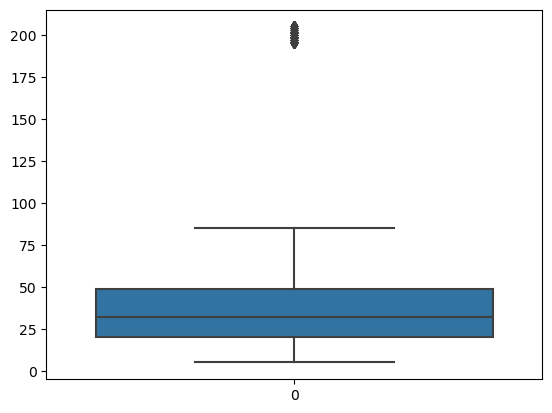

In [71]:
sns.boxplot(crop['K'])

In [72]:
q1=crop['K'].quantile(0.25)
q3=crop['K'].quantile(0.75)
iqr=q3-q1
maximum=q3+1.5*iqr
minimum=q1-1.5*iqr

In [73]:
crop['K'].describe()

count    2200.000000
mean       48.149091
std        50.647931
min         5.000000
25%        20.000000
50%        32.000000
75%        49.000000
max       205.000000
Name: K, dtype: float64

In [74]:
print(maximum)
print(minimum)

92.5
-23.5


Outliers were mainly on the maximum side

In [75]:
crop[crop['K']>maximum]

,N,P,K,temperature,humidity,ph,rainfall,label
1200,24,130,195,29.996772,81.541566,6.112306,67.125345,grapes
1201,13,144,204,30.728040,82.426141,6.092242,68.381355,grapes
1202,22,123,205,32.445778,83.885049,5.896343,68.739325,grapes
1203,36,125,196,37.465668,80.659687,6.155261,66.838723,grapes
1204,24,131,196,22.032962,83.743728,5.732454,65.344408,grapes
...,...,...,...,...,...,...,...,...
1595,40,120,197,23.805938,92.488795,5.889481,119.633555,apple
1596,25,132,198,22.319441,90.851744,5.732758,100.117344,apple
1597,31,137,196,22.144641,93.825674,6.400321,120.631078,apple
1598,36,144,196,23.651676,94.505288,6.496934,115.361127,apple


In [76]:
crop['K']=np.where(
      crop['K']>maximum,
       maximum,
       crop['K']
)

Boxplot of K after capping:

<Axes: >

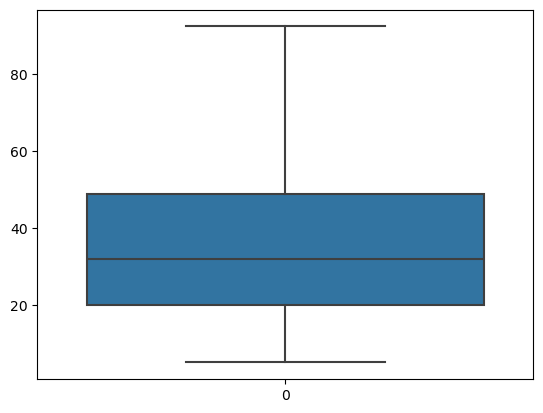

In [77]:
sns.boxplot(crop['K'])

ENCODING

In [78]:
crop_dict = {
    'rice': 1,
    'maize': 2,
    'jute': 3,
    'cotton': 4,
    'coconut': 5,
    'papaya': 6,
    'orange': 7,
    'apple': 8,
    'muskmelon': 9,
    'watermelon': 10,
    'grapes': 11,
    'mango': 12,
    'banana': 13,
    'pomegranate': 14,
    'lentil': 15,
    'blackgram': 16,
    'mungbean': 17,
    'mothbeans': 18,
    'pigeonpeas': 19,
    'kidneybeans': 20,
    'chickpea': 21,
    'coffee': 22
}
crop['crop_num']=crop['label'].map(crop_dict)

In [79]:
crop['crop_num'].value_counts()

crop_num
1     100
2     100
3     100
4     100
5     100
6     100
7     100
8     100
9     100
10    100
11    100
12    100
13    100
14    100
15    100
16    100
17    100
18    100
19    100
20    100
21    100
22    100
Name: count, dtype: int64

In [80]:
crop.drop('label',axis=1,inplace=True)
crop.head()

,N,P,K,temperature,humidity,ph,rainfall,crop_num
0,90,42,43.0,20.879744,82.002744,6.502985,202.935536,1
1,85,58,41.0,21.770462,80.319644,7.038096,226.655537,1
2,60,55,44.0,23.004459,82.320763,7.840207,263.964248,1
3,74,35,40.0,26.491096,80.158363,6.980401,242.864034,1
4,78,42,42.0,20.130175,81.604873,7.628473,262.717340,1


TRAIN TEST SPLIT

In [81]:
X = crop.drop('crop_num',axis=1)
y = crop['crop_num']

In [82]:
X.shape

(2200, 7)

In [83]:
y.shape

(2200,)

In [84]:
from sklearn.model_selection import train_test_split

In [85]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [86]:
X_train.shape

(1760, 7)

In [87]:
X_train.head()

,N,P,K,temperature,humidity,ph,rainfall
1656,17,16,14.0,16.396243,92.181519,6.625539,102.944161
752,37,79,19.0,27.543848,69.347863,7.143943,69.408782
892,7,73,25.0,27.521856,63.132153,7.288057,45.208411
1041,101,70,48.0,25.360592,75.031933,6.012697,116.553145
1179,0,17,30.0,35.474783,47.972305,6.279134,97.790725


In [88]:
X_test.shape

(440, 7)

In [89]:
y_train.head()

1656     7
752     16
892     15
1041    13
1179    12
Name: crop_num, dtype: int64

In [90]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
le.fit(y_train)

LabelEncoder()

In [91]:
le.classes_

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22], dtype=int64)

Now we will compare the accuracies and decide which model is best for making predictions

In [92]:
from sklearn.metrics import accuracy_score

Logistic Regression

In [93]:
from sklearn.linear_model import LogisticRegression
LR=LogisticRegression()
LR.fit(X_train,y_train)
y_pred=LR.predict(X_test)
print("Accuracy is ",accuracy_score(y_test,y_pred))

Accuracy is  0.9454545454545454


C:\Users\deepu\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


NaiveBayes

In [94]:
from sklearn.naive_bayes import GaussianNB
NB=GaussianNB()
NB.fit(X_train,y_train)
y_pred2=NB.predict(X_test)
print("Accuracy is ",accuracy_score(y_test,y_pred2))

Accuracy is  0.9954545454545455


KNN

In [95]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier()
knn.fit(X_train,y_train)
y_pred3=knn.predict(X_test)
print("Accuracy is ",accuracy_score(y_test,y_pred3))

Accuracy is  0.9704545454545455


Support Vector Model

In [96]:
from sklearn.svm import SVC
svm=SVC()
svm.fit(X_train,y_train)
y_pred4=svm.predict(X_test)
print("Accuracy is ",accuracy_score(y_test,y_pred4))

Accuracy is  0.9613636363636363


Decision Tree

In [97]:
    from sklearn.tree import ExtraTreeClassifier
    DT=ExtraTreeClassifier()
    DT.fit(X_train,y_train)
    y_pred5=DT.predict(X_test)
    print("Accuracy is ",accuracy_score(y_test,y_pred5))

Accuracy is  0.8909090909090909


Random Forest

In [98]:
from sklearn.ensemble import RandomForestClassifier
RF=RandomForestClassifier()
RF.fit(X_train,y_train)
y_pred6=RF.predict(X_test)
print("Accuracy is ",accuracy_score(y_test,y_pred6))

Accuracy is  0.9931818181818182


XGBoost

In [99]:
from sklearn.ensemble import HistGradientBoostingClassifier
XG=HistGradientBoostingClassifier()
XG.fit(X_train,y_train)
y_pred7=XG.predict(X_test)
print("Accuracy is ",accuracy_score(y_test,y_pred7))

Accuracy is  0.9840909090909091


comparing the accuracies, it is found that Naive Bayes has highest Accuracy. so I have used Naive Bayes in my final prediction model.

In [100]:
models = {
    'Logistic Regression': LogisticRegression(),
    'Naive Bayes': GaussianNB(),
    'Support Vector Machine': SVC(),
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'Random Forest': RandomForestClassifier(),
    'Gradient Boosting': HistGradientBoostingClassifier(),
    'Extra Trees': ExtraTreeClassifier(),
}

MAKING PREDICTION

In [101]:
data={'N':[94],'P':[95],'K':[90],'temperature':[40.0],'humidity':[12.0],'ph':[9.5],'rainfall':[90.0]}
example = pd.DataFrame(data)

In [102]:
prediction=NB.predict(example)


In [103]:

crop_dict = {1: "Rice", 2: "Maize", 3: "Jute", 4: "Cotton", 5: "Coconut", 6: "Papaya", 7: "Orange",
                 8: "Apple", 9: "Muskmelon", 10: "Watermelon", 11: "Grapes", 12: "Mango", 13: "Banana",
                 14: "Pomegranate", 15: "Lentil", 16: "Blackgram", 17: "Mungbean", 18: "Mothbeans",
                 19: "Pigeonpeas", 20: "Kidneybeans", 21: "Chickpea", 22: "Coffee"}
if prediction[0] in crop_dict:
    crop = crop_dict[prediction[0]]
    print("{} is a best crop to be cultivated ".format(crop))
else:
    print("Sorry are not able to recommend a proper crop for this environment")

Chickpea is a best crop to be cultivated 


In [104]:
import pickle
pickle.dump(NB, open('model.pkl','wb'))
model=pickle.load(open('model.pkl','rb'))

In [105]:
data={'N':[34],'P':[45],'K':[60],'temperature':[35.0],'humidity':[25.0],'ph':[6.5],'rainfall':[29.0]}
example = pd.DataFrame(data)

In [106]:
prediction=model.predict(example)


In [107]:
crop_dict = {1: "Rice", 2: "Maize", 3: "Jute", 4: "Cotton", 5: "Coconut", 6: "Papaya", 7: "Orange",
                 8: "Apple", 9: "Muskmelon", 10: "Watermelon", 11: "Grapes", 12: "Mango", 13: "Banana",
                 14: "Pomegranate", 15: "Lentil", 16: "Blackgram", 17: "Mungbean", 18: "Mothbeans",
                 19: "Pigeonpeas", 20: "Kidneybeans", 21: "Chickpea", 22: "Coffee"}
if prediction[0] in crop_dict:
    crop = crop_dict[prediction[0]]
    print("{} is a best crop to be cultivated ".format(crop))
else:
    print("Sorry are not able to recommend a proper crop for this environment")

Mothbeans is a best crop to be cultivated 
